### This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.


In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=39a8118363484d3b47d9aa09114217479887c504ec2be947b834e8b5be5264ce
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

In [32]:
from ISLP import load_data

Weekly = load_data('Weekly')
Weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 畫混淆矩陣的函數
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

In [35]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {"confusion_matrix": conf_matrix, "accuracy": accuracy}


### logistic regression

混淆矩陣：
[[ 9 34]
 [ 5 56]]

整體正確率：0.62


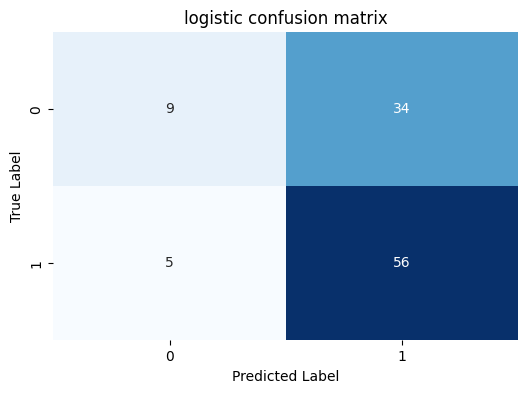

In [36]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# 選擇訓練集和測試集 (1990-2008 作為訓練數據, 2009-2010 作為測試數據)
train_data = Weekly[Weekly['Year'] <= 2008]
test_data = Weekly[Weekly['Year'] > 2008]

# 定義訓練集與測試集的自變數和應變數
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# 訓練邏輯回歸模型
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 預測測試集
y_pred = log_reg.predict(X_test)

# 計算混淆矩陣和正確率
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("混淆矩陣：")
print(conf_matrix)
print(f"\n整體正確率：{accuracy:.2f}")


conf_matrix_log = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_matrix_log, "logistic confusion matrix")

### (e)Now fit the "LDA" model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

LDA 混淆矩陣：
[[ 9 34]
 [ 5 56]]

LDA 整體正確率：0.62


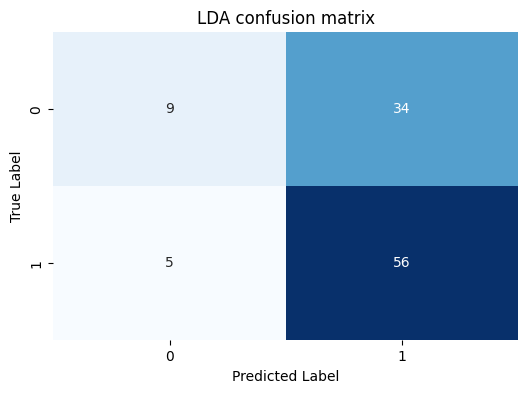

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# 選擇訓練集和測試集 (1990-2008 作為訓練數據, 2009-2010 作為測試數據)
train_data = Weekly[Weekly['Year'] <= 2008]
test_data = Weekly[Weekly['Year'] > 2008]

# 定義訓練集與測試集的自變數和應變數
X_train = train_data[['Lag2']]
y_train = train_data['Direction']
X_test = test_data[['Lag2']]
y_test = test_data['Direction']

# 訓練 LDA 模型
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# 預測測試集
y_pred_lda = lda.predict(X_test)

# 計算混淆矩陣和正確率
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("LDA 混淆矩陣：")
print(conf_matrix_lda)
print(f"\nLDA 整體正確率：{accuracy_lda:.2f}")

conf_matrix_log = confusion_matrix(y_test, y_pred_lda)
plot_confusion_matrix(conf_matrix_log, "LDA confusion matrix")

### (f) Repeat (e) using QDA.

QDA 混淆矩陣：
[[ 0 43]
 [ 0 61]]

QDA 整體正確率：0.59


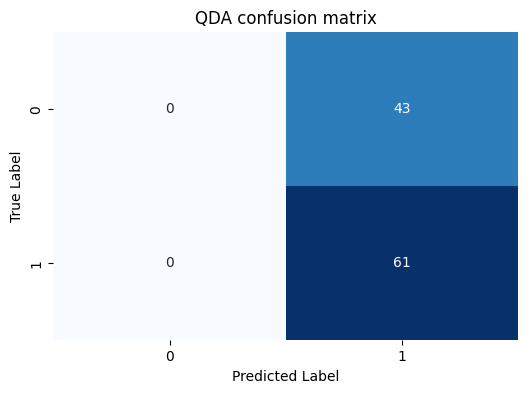

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 訓練 QDA 模型
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# 預測測試集
y_pred_qda = qda.predict(X_test)

# 計算混淆矩陣和正確率
conf_matrix_qda = confusion_matrix(y_test, y_pred_qda)
accuracy_qda = accuracy_score(y_test, y_pred_qda)

print("QDA 混淆矩陣：")
print(conf_matrix_qda)
print(f"\nQDA 整體正確率：{accuracy_qda:.2f}")

conf_matrix_log = confusion_matrix(y_test, y_pred_qda)
plot_confusion_matrix(conf_matrix_log, "QDA confusion matrix")

### (g) Repeat (e) using KNN with K = 1.

KNN (K=1) 混淆矩陣：
[[22 21]
 [32 29]]

KNN (K=1) 整體正確率：0.49


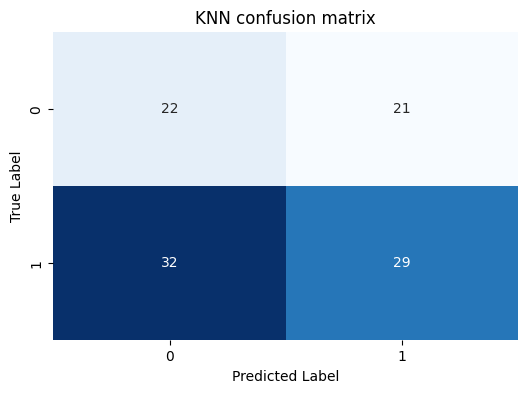

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# 訓練 KNN 模型 (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 預測測試集
y_pred_knn = knn.predict(X_test)

# 計算混淆矩陣和正確率
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("KNN (K=1) 混淆矩陣：")
print(conf_matrix_knn)
print(f"\nKNN (K=1) 整體正確率：{accuracy_knn:.2f}")

conf_matrix_log = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(conf_matrix_log, "KNN confusion matrix")

### (h) Repeat (e) using naive Bayes.

Naive Bayes 混淆矩陣：
[[ 0 43]
 [ 0 61]]

Naive Bayes 整體正確率：0.59


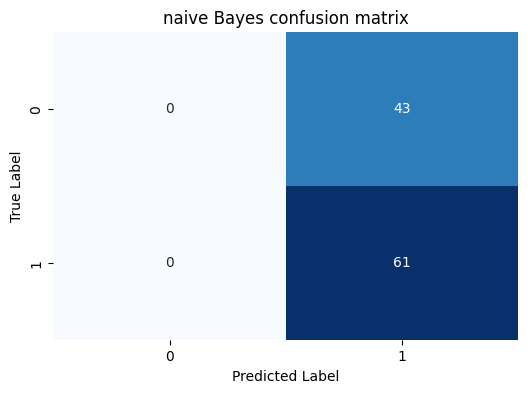

In [40]:
from sklearn.naive_bayes import GaussianNB

# 訓練 Naive Bayes 模型
nb = GaussianNB()
nb.fit(X_train, y_train)

# 預測測試集
y_pred_nb = nb.predict(X_test)

# 計算混淆矩陣和正確率
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes 混淆矩陣：")
print(conf_matrix_nb)
print(f"\nNaive Bayes 整體正確率：{accuracy_nb:.2f}")

conf_matrix_log = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(conf_matrix_log, "naive Bayes confusion matrix")

### (i) Which of these methods appears to provide the best results on this data?

* LDA 模型的總體正確預測數最高（65），且在兩個類別上均能進行有效預測。
* QDA 和 Naive Bayes 模型過於偏向 Up 類別，因此在預測 Down 類別時表現不佳。
* KNN 的預測相對均衡，但整體正確預測數較低（51）。


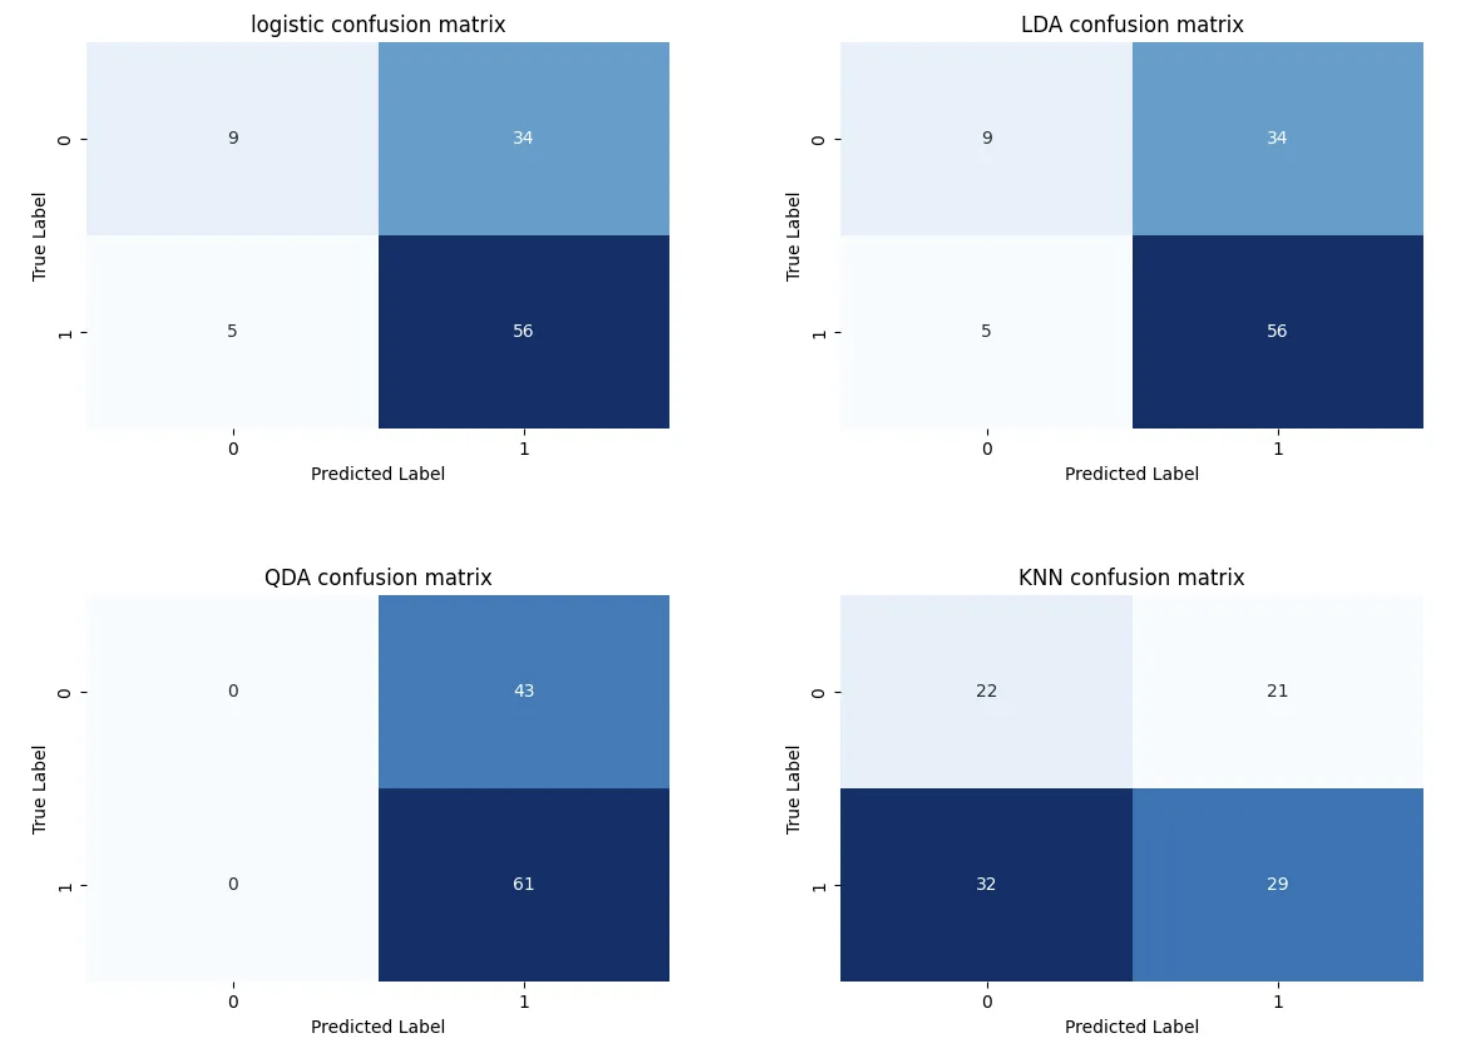

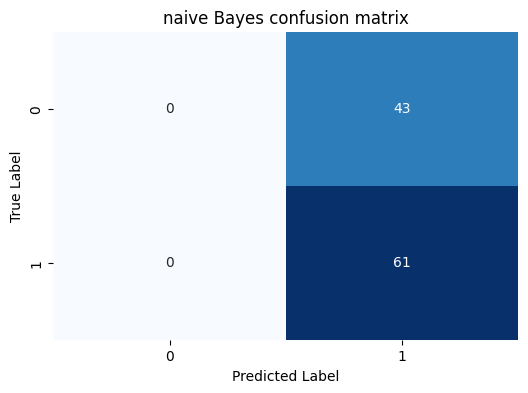

### (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.



KNN (K=1) 混淆矩陣：
[[22 21]
 [32 29]]
KNN (K=1) 整體正確率：0.49


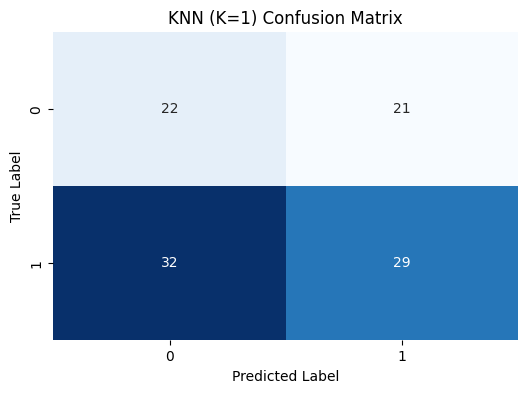


KNN (K=3) 混淆矩陣：
[[16 27]
 [19 42]]
KNN (K=3) 整體正確率：0.56


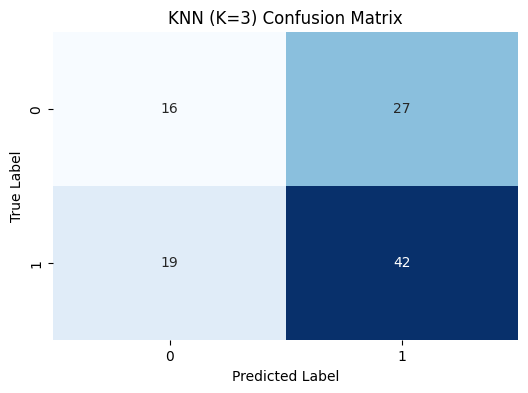


KNN (K=5) 混淆矩陣：
[[16 27]
 [21 40]]
KNN (K=5) 整體正確率：0.54


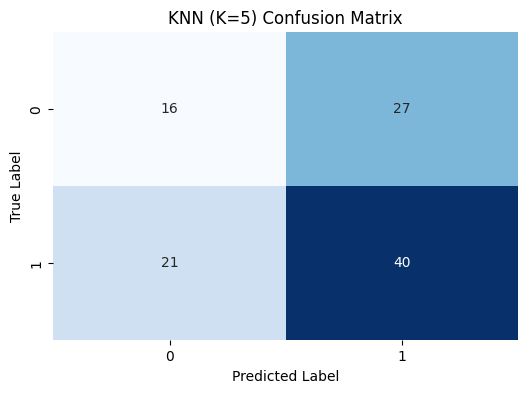


KNN (K=7) 混淆矩陣：
[[16 27]
 [20 41]]
KNN (K=7) 整體正確率：0.55


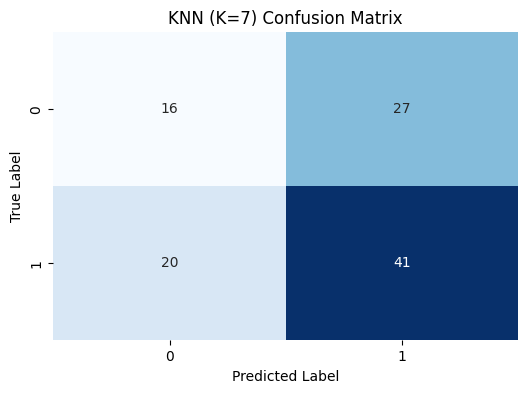


KNN (K=9) 混淆矩陣：
[[17 26]
 [20 41]]
KNN (K=9) 整體正確率：0.56


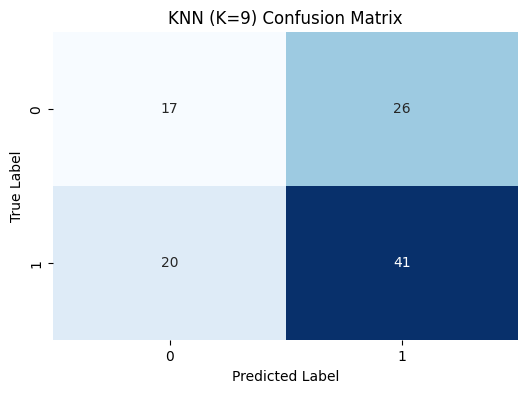

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 定義一個函數來繪製混淆矩陣
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# 設定要測試的 K 值
k_values = [1, 3, 5, 7, 9]

# 迴圈遍歷每個 K 值，訓練模型並計算正確率和混淆矩陣
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # 計算混淆矩陣和正確率
    conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    # 輸出結果
    print(f"\nKNN (K={k}) 混淆矩陣：")
    print(conf_matrix_knn)
    print(f"KNN (K={k}) 整體正確率：{accuracy_knn:.2f}")

    # 繪製混淆矩陣
    plot_confusion_matrix(conf_matrix_knn, f"KNN (K={k}) Confusion Matrix")


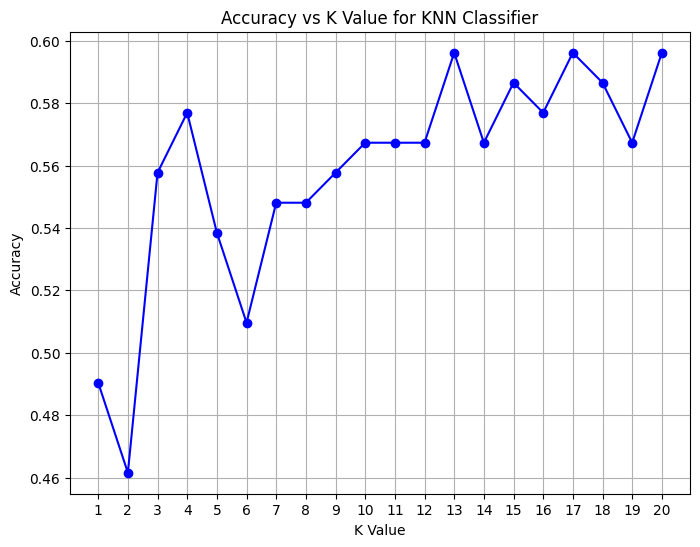

In [42]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 記錄每個 K 值的正確率
k_values = list(range(1, 21))
accuracies = []

# 迴圈遍歷每個 K 值，訓練模型並計算正確率
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    # 計算正確率
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracies.append(accuracy_knn)

# 繪製 K 值對應正確率的折線圖
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value for KNN Classifier")
plt.xticks(k_values)  # 標記每個 K 值
plt.grid(True)
plt.show()


In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split # Importing train_test_split

Weekly['Direction'] = Weekly['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

X_train, X_test, y_train, y_test = train_test_split(
    Weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']],
    Weekly['Direction'],
    test_size=len(Weekly[Weekly['Year'] >= 2008]) / len(Weekly),
    random_state=42,
    stratify=Weekly['Direction']
)
# features transfromation
X_train['Lag1_Lag2'] = X_train['Lag1'] * X_train['Lag2']
X_train['Volume_squared'] = X_train['Volume'] ** 2
X_test['Lag1_Lag2'] = X_test['Lag1'] * X_test['Lag2']
X_test['Volume_squared'] = X_test['Volume'] ** 2

#dictionary to save the results#
results = {}

def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {"confusion_matrix": conf_matrix, "accuracy": accuracy}

# Logistic Regression
evaluate_model(LogisticRegression(), "Logistic Regression")

# LDA
evaluate_model(LinearDiscriminantAnalysis(), "LDA")

# QDA
evaluate_model(QuadraticDiscriminantAnalysis(), "QDA")

# Naive Bayes
evaluate_model(GaussianNB(), "Naive Bayes")

# Find the best
best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
for model_name, result in results.items():
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print(f"Accuracy: {result['accuracy']:.4f}")

print(f"\nBest Model: {best_model[0]} with Accuracy: {best_model[1]['accuracy']:.4f}")



Model: Logistic Regression
Confusion Matrix:
[[11 58]
 [10 77]]
Accuracy: 0.5641

Model: LDA
Confusion Matrix:
[[11 58]
 [10 77]]
Accuracy: 0.5641

Model: QDA
Confusion Matrix:
[[17 52]
 [24 63]]
Accuracy: 0.5128

Model: Naive Bayes
Confusion Matrix:
[[14 55]
 [15 72]]
Accuracy: 0.5513

Best Model: Logistic Regression with Accuracy: 0.5641
